In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import pickle

Column names: ['Gesture', 'Accel_X', 'Accel_Y', 'Accel_Z', 'Gyro_X', 'Gyro_Y', 'Gyro_Z', 'Temperature']
              precision    recall  f1-score   support

        down       1.00      0.80      0.89         5
        left       1.00      0.75      0.86         4
       right       0.80      1.00      0.89         4
          up       0.80      1.00      0.89         4

    accuracy                           0.88        17
   macro avg       0.90      0.89      0.88        17
weighted avg       0.91      0.88      0.88        17



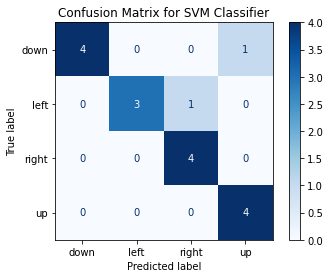

In [6]:
import os
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from scipy.fft import fft
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Set directory containing gesture files
data_dir = 'data'
gesture_files = [f for f in os.listdir(data_dir) if f.endswith('.csv')]

# Initialize list to hold all data
all_data = []

# Load and preprocess each file by removing the first two and last two rows
for file in gesture_files:
    file_path = os.path.join(data_dir, file)
    # Load each CSV file with comma delimiter
    df = pd.read_csv(file_path, delimiter=',')
    df.columns = df.columns.str.strip()  # Remove any leading/trailing spaces from column names
    df = df.iloc[2:-2]  # Remove first two and last two rows
    df['Gesture'] = file.split('_')[0]  # Extract gesture label from filename
    all_data.append(df)

# Concatenate all data into one DataFrame
data = pd.concat(all_data, ignore_index=True)

# Verify that column names are correct now
print("Column names:", data.columns.tolist())

# List of sensor columns
sensor_columns = ['Accel_X', 'Accel_Y', 'Accel_Z', 'Gyro_X', 'Gyro_Y', 'Gyro_Z']

# Define a function to compute FFT features
def compute_fft_features(data):
    # Apply FFT and keep only the magnitudes of frequencies
    fft_features = []
    for col in sensor_columns:
        # Perform FFT on each column (time series)
        fft_values = fft(data[col].values)
        # Take magnitude and keep a fixed number of frequencies (e.g., first 10 components)
        fft_magnitude = np.abs(fft_values)[:10]
        fft_features.extend(fft_magnitude)
    return fft_features

# Extract FFT features for each gesture
X = []
y = []

# Loop through each gesture segment (assumed to be each file here)
for file in gesture_files:
    file_path = os.path.join(data_dir, file)
    df = pd.read_csv(file_path, delimiter=',')
    df.columns = df.columns.str.strip()  # Remove any leading/trailing spaces
    df = df.iloc[2:-2]  # Remove first two and last two rows
    gesture_label = file.split('_')[0]  # Extract gesture from filename
    
    # Compute FFT features for the current segment
    features = compute_fft_features(df)
    X.append(features)
    y.append(gesture_label)

# Convert to numpy arrays
X = np.array(X)
y = np.array(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM classifier
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train)

filename = 'svm_model_fft.pkl'
with open(filename, 'wb') as file:
    pickle.dump(svm_model, file)

# Make predictions and evaluate
y_pred = svm_model.predict(X_test)
train_pred = svm_model.predict(X_train)
print(classification_report(y_test, y_pred))

# Display confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for SVM Classifier")
plt.show()


In [7]:
import os
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from scipy.fft import fft

# Assume `svm_model` is the trained model from previous code
# Also assume `sensor_columns` and `compute_fft_features` are already defined

# Function to predict gesture from a new file
def predict_gesture_from_file(file_path, model, sensor_columns):
    # Load and preprocess the file
    df = pd.read_csv(file_path, delimiter=',')
    df.columns = df.columns.str.strip()  # Remove any leading/trailing spaces
    df = df.iloc[2:-2]  # Remove first two and last two rows
    
    # Extract FFT features
    features = compute_fft_features(df)
    features = np.array(features).reshape(1, -1)  # Reshape to match model input format

    # Predict gesture
    prediction = model.predict(features)
    return prediction[0]

# Example usage:
new_file_path = 'data/right_00.csv'  # Path to the new CSV file
predicted_gesture = predict_gesture_from_file(new_file_path, svm_model, sensor_columns)
print(f"The predicted gesture is: {predicted_gesture}")


The predicted gesture is: right


# Visualization

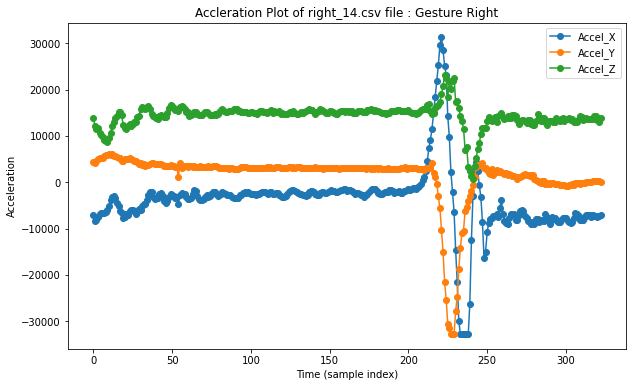

In [50]:
df = pd.read_csv('data/right_14.csv')

# Plot acceleration data (Accel_X, Accel_Y, Accel_Z)
plt.figure(figsize=(10, 6))
plt.plot(df.index, df["Accel_X"], label="Accel_X", marker='o')
plt.plot(df.index, df["Accel_Y"], label="Accel_Y", marker='o')
plt.plot(df.index, df["Accel_Z"], label="Accel_Z", marker='o')

# Adding labels and title
plt.xlabel("Time (sample index)")
plt.ylabel("Acceleration")
plt.title("Accleration Plot of right_14.csv file : Gesture Right")
plt.legend()

# Show plot
plt.show()

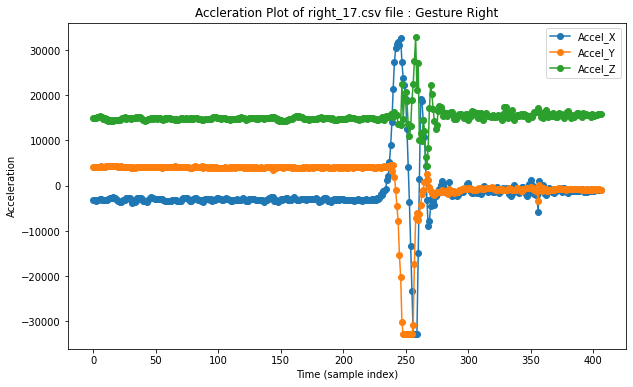

In [51]:
df = pd.read_csv('data/right_17.csv')

# Plot acceleration data (Accel_X, Accel_Y, Accel_Z)
plt.figure(figsize=(10, 6))
plt.plot(df.index, df["Accel_X"], label="Accel_X", marker='o')
plt.plot(df.index, df["Accel_Y"], label="Accel_Y", marker='o')
plt.plot(df.index, df["Accel_Z"], label="Accel_Z", marker='o')

# Adding labels and title
plt.xlabel("Time (sample index)")
plt.ylabel("Acceleration")
plt.title("Accleration Plot of right_17.csv file : Gesture Right")
plt.legend()

# Show plot
plt.show()

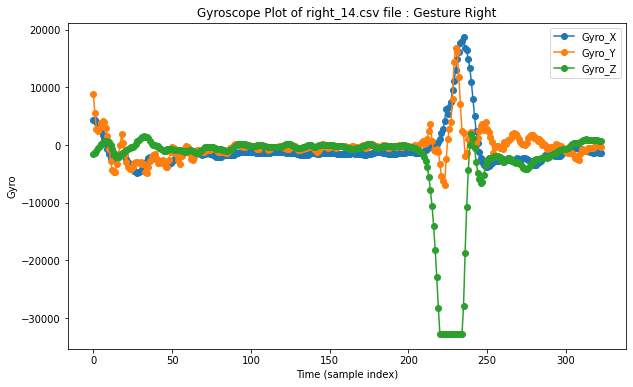

In [60]:
df = pd.read_csv('data/right_14.csv')

# Plot gyro data
plt.figure(figsize=(10, 6))
plt.plot(df.index, df["Gyro_X"], label="Gyro_X", marker='o')
plt.plot(df.index, df["Gyro_Y"], label="Gyro_Y", marker='o')
plt.plot(df.index, df["Gyro_Z"], label="Gyro_Z", marker='o')

# Adding labels and title
plt.xlabel("Time (sample index)")
plt.ylabel("Gyro")
plt.title("Gyroscope Plot of right_14.csv file : Gesture Right")
plt.legend()

# Show plot
plt.show()

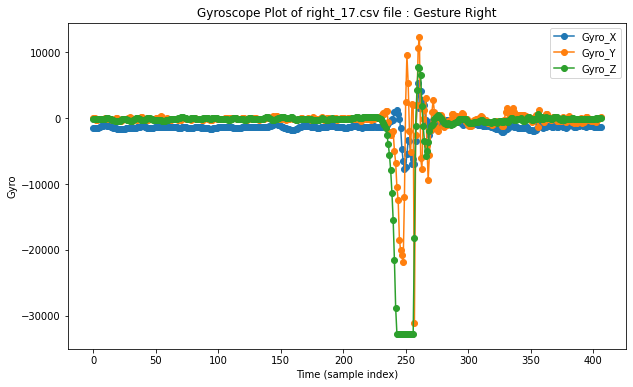

In [61]:
df = pd.read_csv('data/right_17.csv')

# Plot acceleration data (Accel_X, Accel_Y, Accel_Z)
plt.figure(figsize=(10, 6))
plt.plot(df.index, df["Gyro_X"], label="Gyro_X", marker='o')
plt.plot(df.index, df["Gyro_Y"], label="Gyro_Y", marker='o')
plt.plot(df.index, df["Gyro_Z"], label="Gyro_Z", marker='o')

# Adding labels and title
plt.xlabel("Time (sample index)")
plt.ylabel("Gyro")
plt.title("Gyroscope Plot of right_17.csv file : Gesture Right")
plt.legend()

# Show plot
plt.show()

  Gesture  Accel_X  Accel_Y  Accel_Z  Gyro_X  Gyro_Y  Gyro_Z  Temperature
0      UP    -3176     4200    14884   -1538     -26    -128        29.66
1      UP    -3224     4120    14900   -1533     -58    -126        29.57
2      UP    -3328     4180    14884   -1520    -364    -144        29.57
3      UP    -3156     4192    15184   -1492    -349    -115        29.66
4      UP    -3052     4220    15196   -1445    -149     -95        29.57


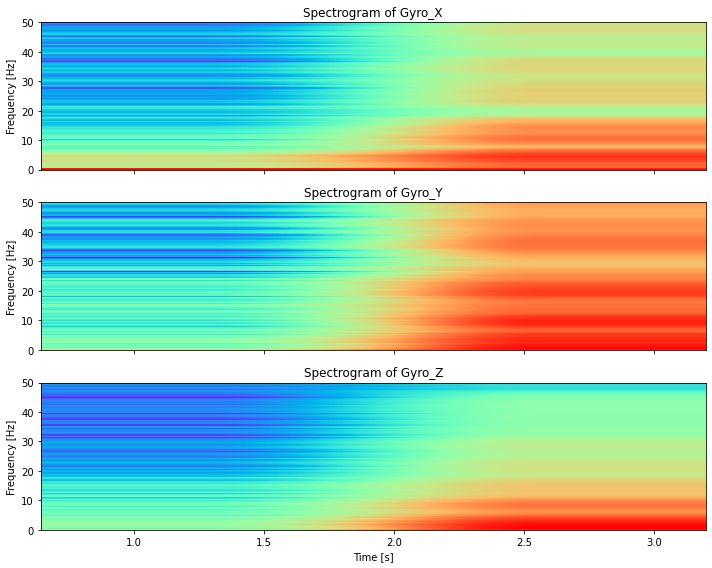

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file (replace 'your_file.csv' with the actual file path)
file_path = "data/right_17.csv"  # Replace with your actual file path
df = pd.read_csv(file_path)

# Ensure the data has been loaded correctly
print(df.head())

# Set the time difference to sample data (time interval between measurements)
# In this case, you can assume a constant sampling rate (adjust as needed).
Time_difference = 0.01  # Adjust this based on the actual time between samples in your dataset.

# Generate the time array based on the number of samples in the data
Time_Array = np.arange(0, len(df) * Time_difference, Time_difference)

# Plot the spectrogram for each acceleration axis
fig, axs = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

for i, axis in enumerate(["Gyro_X", "Gyro_Y", "Gyro_Z"]):
    # Extract the data for the current axis
    Data = df[axis].values

    # Generate the spectrogram
    axs[i].specgram(Data, Fs=1/Time_difference, cmap="rainbow")
    axs[i].set_ylabel("Frequency [Hz]")
    axs[i].set_title(f"Spectrogram of {axis}")

# Add an overall x-label and display the plot
axs[-1].set_xlabel("Time [s]")
plt.tight_layout()
plt.show()


  Gesture  Accel_X  Accel_Y  Accel_Z  Gyro_X  Gyro_Y  Gyro_Z  Temperature
0      UP    -4196     2568    14936   -1324      10    -156        29.85
1      UP    -4164     2572    14812   -1338     -37     -99        29.85
2      UP    -3924     2608    14872   -1321     -74    -103        29.85
3      UP    -3932     2752    14792   -1316     -85    -139        29.75
4      UP    -3908     2716    14844   -1309    -113    -186        29.85


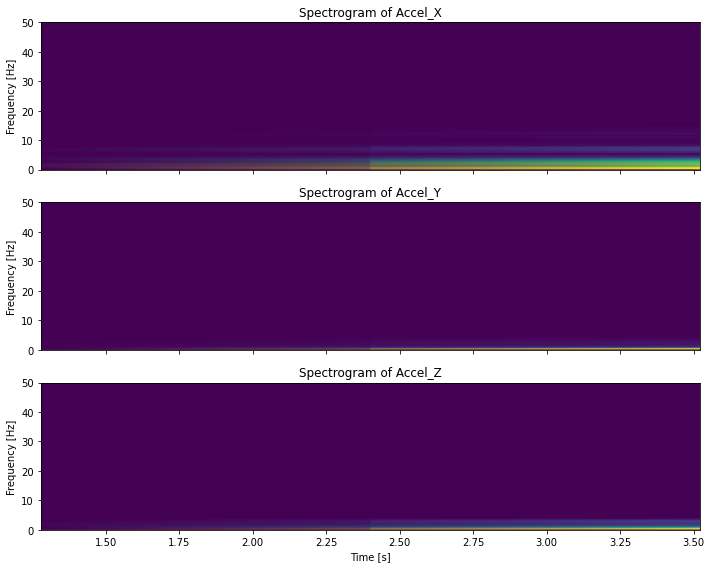

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

# Load the CSV file (replace 'your_file.csv' with your actual file path)
file_path = "data/up_20.csv"  # Replace with your actual file path
df = pd.read_csv(file_path)

# Display the first few rows to verify data loading
print(df.head())

# Set the sampling frequency
fs = 100  # 100 Hz based on your data collection setup

# Plot the spectrogram for each acceleration axis
fig, axs = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

for i, axis in enumerate(["Accel_X", "Accel_Y", "Accel_Z"]):
    # Extract the data for the current axis
    data = df[axis].values

    # Compute the spectrogram
    f, t, Sxx = spectrogram(data, fs=fs)

    # Plot the spectrogram
    axs[i].pcolormesh(t, f, Sxx, shading='gouraud', cmap='viridis')
    axs[i].set_ylabel("Frequency [Hz]")
    axs[i].set_title(f"Spectrogram of {axis}")

# Set overall labels and show the plot
axs[-1].set_xlabel("Time [s]")
plt.tight_layout()
plt.show()


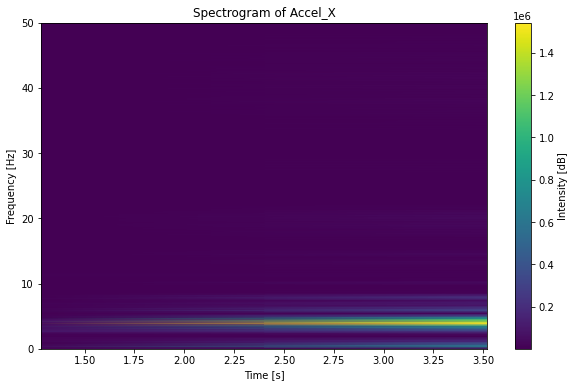

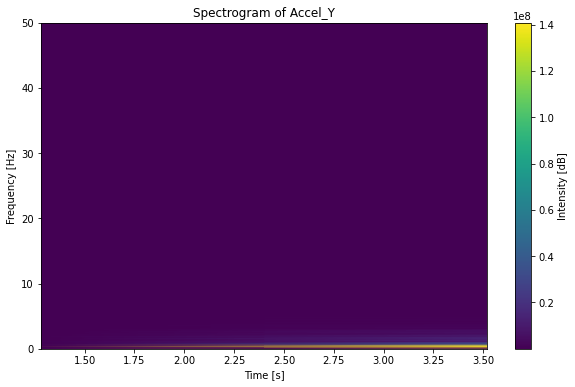

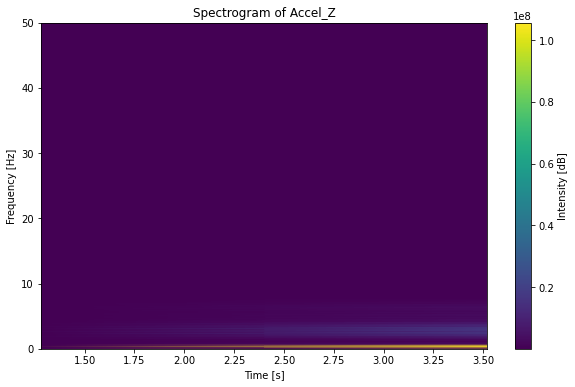

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram


file_path = "data/down_20.csv"  # Replace with your actual file path
df = pd.read_csv(file_path)

# Set the sampling frequency
fs = 100  # 100 Hz based on your data collection setup

# Plot the spectrogram for each acceleration axis separately
for axis in ["Accel_X", "Accel_Y", "Accel_Z"]:
    # Extract the data for the current axis
    data = df[axis].values

    # Compute the spectrogram
    f, t, Sxx = spectrogram(data, fs=fs)

    # Create a new figure for each spectrogram
    plt.figure(figsize=(10, 6))
    plt.pcolormesh(t, f, Sxx, shading='gouraud', cmap='viridis')
    plt.colorbar(label="Intensity [dB]")
    plt.ylabel("Frequency [Hz]")
    plt.xlabel("Time [s]")
    plt.title(f"Spectrogram of {axis}")
    plt.show()


# Other Models

In [3]:
import os
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from scipy.fft import fft
import pickle
import matplotlib.pyplot as plt

# Set directory containing gesture files
data_dir = 'data/'
gesture_files = [f for f in os.listdir(data_dir) if f.endswith('.csv')]

# Initialize list to hold all data
all_data = []

# Load and preprocess each file by removing the first two and last two rows
for file in gesture_files:
    file_path = os.path.join(data_dir, file)
    df = pd.read_csv(file_path, delimiter=',')
    df.columns = df.columns.str.strip()  # Remove any leading/trailing spaces from column names
    df = df.iloc[2:-2]  # Remove first two and last two rows
    df['Gesture'] = file.split('_')[0]  # Extract gesture label from filename
    all_data.append(df)

# Concatenate all data into one DataFrame
data = pd.concat(all_data, ignore_index=True)

# List of sensor columns
sensor_columns = ['Accel_X', 'Accel_Y', 'Accel_Z', 'Gyro_X', 'Gyro_Y', 'Gyro_Z']

# Define a function to compute FFT features
def compute_fft_features(data):
    fft_features = []
    for col in sensor_columns:
        fft_values = fft(data[col].values)
        fft_magnitude = np.abs(fft_values)[:10]
        fft_features.extend(fft_magnitude)
    return fft_features

# Extract FFT features and labels
X = []
y = []

for file in gesture_files:
    file_path = os.path.join(data_dir, file)
    df = pd.read_csv(file_path, delimiter=',')
    df.columns = df.columns.str.strip()
    df = df.iloc[2:-2]
    gesture_label = file.split('_')[0]
    features = compute_fft_features(df)
    X.append(features)
    y.append(gesture_label)

X = np.array(X)
y = np.array(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dictionary to store models and their results
models = {
    "SVM": SVC(kernel='linear', probability=True, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

# Train, evaluate, and save each model
for name, model in models.items():
    print(f"\nTraining {name} model...")
    model.fit(X_train, y_train)
    
    # Save model
    filename = f'{name.lower().replace(" ", "_")}_model.pkl'
    with open(filename, 'wb') as file:
        pickle.dump(model, file)
    print(f"Model saved as {filename}.")
    
    # Evaluate on the test set
    y_pred = model.predict(X_test)
    print(f"\n{name} Classification Report:\n")
    print(classification_report(y_test, y_pred))
    
    # Display confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix for {name}")
    plt.show()


ValueError: No objects to concatenate

['down' 'left' 'right' 'up']

Training SVM model...
Model saved as svm_model.pkl.

SVM Classification Report:

              precision    recall  f1-score   support

        down       1.00      1.00      1.00         5
        left       1.00      0.75      0.86         4
       right       0.80      1.00      0.89         4
          up       1.00      1.00      1.00         4

    accuracy                           0.94        17
   macro avg       0.95      0.94      0.94        17
weighted avg       0.95      0.94      0.94        17



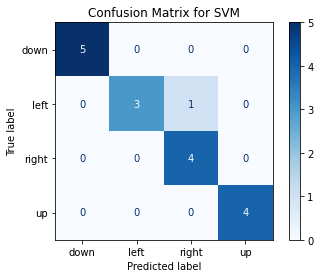


Training KNN model...
Model saved as knn_model.pkl.

KNN Classification Report:

              precision    recall  f1-score   support

        down       1.00      1.00      1.00         5
        left       1.00      1.00      1.00         4
       right       1.00      1.00      1.00         4
          up       1.00      1.00      1.00         4

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17



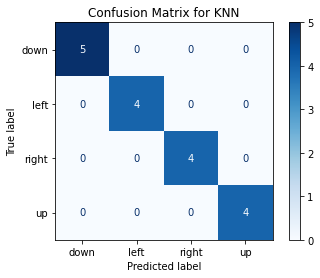


Training Random Forest model...
Model saved as random_forest_model.pkl.

Random Forest Classification Report:

              precision    recall  f1-score   support

        down       1.00      1.00      1.00         5
        left       1.00      1.00      1.00         4
       right       1.00      1.00      1.00         4
          up       1.00      1.00      1.00         4

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17



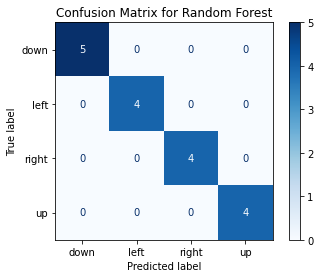


Training XGBoost model...
Model saved as xgboost_model.pkl.

XGBoost Classification Report:

              precision    recall  f1-score   support

        down       1.00      1.00      1.00         5
        left       1.00      1.00      1.00         4
       right       1.00      1.00      1.00         4
          up       1.00      1.00      1.00         4

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17



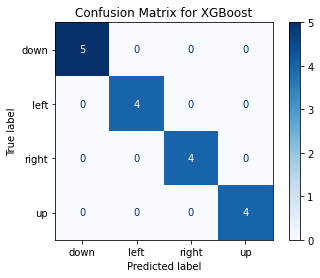

In [11]:
import os
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from scipy.fft import fft
import pickle
import matplotlib.pyplot as plt

# Set directory containing gesture files
data_dir = 'data'
gesture_files = [f for f in os.listdir(data_dir) if f.endswith('.csv')]

# Initialize list to hold all data
all_data = []

# Load and preprocess each file by removing the first two and last two rows
for file in gesture_files:
    file_path = os.path.join(data_dir, file)
    df = pd.read_csv(file_path, delimiter=',')
    df.columns = df.columns.str.strip()  # Remove any leading/trailing spaces from column names
    df = df.iloc[2:-2]  # Remove first two and last two rows
    df['Gesture'] = file.split('_')[0]  # Extract gesture label from filename
    all_data.append(df)

# Concatenate all data into one DataFrame
data = pd.concat(all_data, ignore_index=True)

# List of sensor columns
sensor_columns = ['Accel_X', 'Accel_Y', 'Accel_Z', 'Gyro_X', 'Gyro_Y', 'Gyro_Z']

# Define a function to compute FFT features
def compute_fft_features(data):
    fft_features = []
    for col in sensor_columns:
        fft_values = fft(data[col].values)
        fft_magnitude = np.abs(fft_values)[:50]  # Use first 50 FFT components
        fft_features.extend(fft_magnitude)
    return fft_features

# Extract FFT features and labels
X = []
y = []

for file in gesture_files:
    file_path = os.path.join(data_dir, file)
    df = pd.read_csv(file_path, delimiter=',')
    df.columns = df.columns.str.strip()
    df = df.iloc[2:-2]
    gesture_label = file.split('_')[0]
    features = compute_fft_features(df)
    X.append(features)
    y.append(gesture_label)

X = np.array(X)
y = np.array(y)

# Encode labels as integers
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # Encode string labels into integers
print(label_encoder.classes_)


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dictionary to store models and their results
models = {
    "SVM": SVC(kernel='linear', probability=True, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

# Train, evaluate, and save each model
for name, model in models.items():
    print(f"\nTraining {name} model...")
    model.fit(X_train, y_train)
    
    # Save model
    filename = f'{name.lower().replace(" ", "_")}_model.pkl'
    with open(filename, 'wb') as file:
        pickle.dump(model, file)
    print(f"Model saved as {filename}.")
    
    # Evaluate on the test set
    y_pred = model.predict(X_test)
    
    # Decode predictions and true labels to original string labels
    y_pred_decoded = label_encoder.inverse_transform(y_pred)
    y_test_decoded = label_encoder.inverse_transform(y_test)
    
    print(f"\n{name} Classification Report:\n")
    print(classification_report(y_test_decoded, y_pred_decoded))
    
    # Display confusion matrix
    cm = confusion_matrix(y_test_decoded, y_pred_decoded, labels=label_encoder.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix for {name}")
    plt.show()



Training SVM model...
Model saved as svm_model.pkl.

SVM Classification Report:

              precision    recall  f1-score   support

        down       1.00      1.00      1.00         5
        left       1.00      0.75      0.86         4
       right       0.80      1.00      0.89         4
          up       1.00      1.00      1.00         4

    accuracy                           0.94        17
   macro avg       0.95      0.94      0.94        17
weighted avg       0.95      0.94      0.94        17



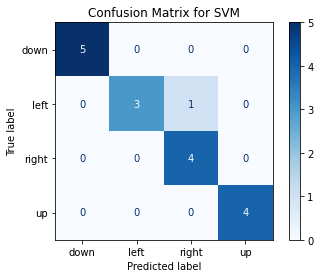


Training KNN model...
Model saved as knn_model.pkl.

KNN Classification Report:

              precision    recall  f1-score   support

        down       1.00      1.00      1.00         5
        left       1.00      1.00      1.00         4
       right       1.00      1.00      1.00         4
          up       1.00      1.00      1.00         4

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17



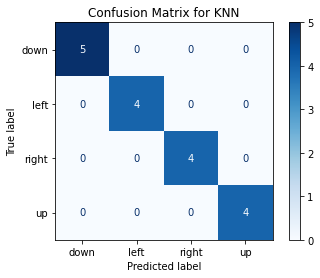


Training Random Forest model...
Model saved as random_forest_model.pkl.

Random Forest Classification Report:

              precision    recall  f1-score   support

        down       1.00      1.00      1.00         5
        left       1.00      1.00      1.00         4
       right       1.00      1.00      1.00         4
          up       1.00      1.00      1.00         4

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17



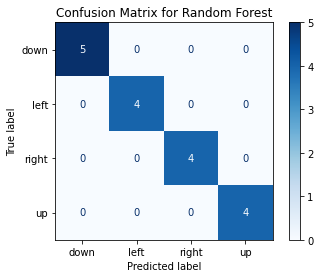

In [12]:
import os
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from scipy.fft import fft
import pickle
import matplotlib.pyplot as plt

# Set directory containing gesture files
data_dir = 'data'
gesture_files = [f for f in os.listdir(data_dir) if f.endswith('.csv')]

# Initialize list to hold all data
all_data = []

# Load and preprocess each file by removing the first two and last two rows
for file in gesture_files:
    file_path = os.path.join(data_dir, file)
    df = pd.read_csv(file_path, delimiter=',')
    df.columns = df.columns.str.strip()  # Remove any leading/trailing spaces from column names
    df = df.iloc[2:-2]  # Remove first two and last two rows
    df['Gesture'] = file.split('_')[0]  # Extract gesture label from filename
    all_data.append(df)

# Concatenate all data into one DataFrame
data = pd.concat(all_data, ignore_index=True)

# List of sensor columns
sensor_columns = ['Accel_X', 'Accel_Y', 'Accel_Z', 'Gyro_X', 'Gyro_Y', 'Gyro_Z']

# Define a function to compute FFT features
def compute_fft_features(data):
    fft_features = []
    for col in sensor_columns:
        fft_values = fft(data[col].values)
        fft_magnitude = np.abs(fft_values)[:50]  # Use first 50 FFT components
        fft_features.extend(fft_magnitude)
    return fft_features

# Extract FFT features and labels
X = []
y = []

for file in gesture_files:
    file_path = os.path.join(data_dir, file)
    df = pd.read_csv(file_path, delimiter=',')
    df.columns = df.columns.str.strip()
    df = df.iloc[2:-2]
    gesture_label = file.split('_')[0]
    features = compute_fft_features(df)
    X.append(features)
    y.append(gesture_label)

X = np.array(X)
y = np.array(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dictionary to store models and their results
models = {
    "SVM": SVC(kernel='linear', probability=True, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Train, evaluate, and save each model
for name, model in models.items():
    print(f"\nTraining {name} model...")
    model.fit(X_train, y_train)
    
    # Save model
    filename = f'{name.lower().replace(" ", "_")}_model.pkl'
    with open(filename, 'wb') as file:
        pickle.dump(model, file)
    print(f"Model saved as {filename}.")
    
    # Evaluate on the test set
    y_pred = model.predict(X_test)
    
    print(f"\n{name} Classification Report:\n")
    print(classification_report(y_test, y_pred))
    
    # Display confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=np.unique(y))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix for {name}")
    plt.show()
